In [7]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [8]:
train = pd.read_csv("./data/usingXGBoost-train.csv")
test = pd.read_csv("./data/usingXGBoost-test.csv")

In [9]:
train.shape, test.shape

((7352, 563), (2947, 563))

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [11]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [12]:
columns = train.columns
columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]', '')
train.columns = columns
test.columns = columns

데이터프레임에서 컬럼명을 정리
train 데이터프레임의 모든 컬럼명을 columns 변수에 할당
str.replace() 함수를 사용하여 괄호(())와 대시(-), 쉼표(,)를 모두 제거
정리된 컬럼명을 다시 train 데이터프레임과 test 데이터프레임에 할당하여 업데이트
->컬럼명이 일관되게 정리되어 있으면 데이터 전처리와 분석 과정에서 편리하게 작업할 수 있음
  여러 컬럼들을 선택하여 연산을 수행 할 때 일관된 컬럼명으로 선택하는 것이 편리

In [13]:
columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [14]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    for index, perplexity in enumerate(perplexities):
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('t-SNE을 활용한 시각화')
        df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",
                   markers=['^', 'v', 's', 'o', '1', '2'])
        plt.title(f"perplexity : {perplexity} and max_iter : {n_iter}")
        img_name = img_name_prefix + f'_perp_{perplexity}_iter_{n_iter}.png'
        plt.savefig(img_name)
        plt.show()
        print('Done')

for index, perplexity in enumerate(perplexities):
 -> perplexities 리스트에 있는 값들을 하나씩 가져오면서 반복문을 실행. enumerate() 인덱스 값을 가져옴.
X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
 -> TSNE() 함수를 이용하여 t-SNE 알고리즘을 실행, 2차원으로 축소한 데이터를 X_reduced 변수에 저장.
df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})
 -> 축소된 데이터를 이용하여 pandas DataFrame 객체를 생성, x축, y축, 라벨 정보를 저장.
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, palette="Set1", markers=['^', 'v', 's', 'o', '1', '2'])
 -> seaborn lmplot() 함수를 이용하여 x축과 y축을 지정, 라벨 정보를 이용하여 색상으로 구분하여 산점도로 시각화.
 -> fit_reg=False 회귀선을 그리지 않음, palette="Set1" 색상 팔레트를 지정, markers 마커의 종류를 리스트 형태로 지정.
plt.title(f"perplexity : {perplexity} and max_iter : {n_iter}")
 -> 그래프의 제목 perplexity와 n_iter 값으로 지정.
img_name = img_name_prefix + f'_perp_{perplexity}_iter_{n_iter}.png'
 -> 이미지 파일 이름을 perplexity와 n_iter 값으로 지정.
plt.savefig(img_name)
 -> 그래프를 이미지 파일로 저장.

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 0.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.095s
[t-SNE] Iteration 50: error = 89.2988052, gradient norm = 0.0308667 (50 iterations in 1.064s)
[t-SNE] Iteration 100: error = 82.9714966, gradient norm = 0.0080259 (50 iterations in 0.767s)
[t-SNE] Iteration 150: error = 81.5985794, gradient norm = 0

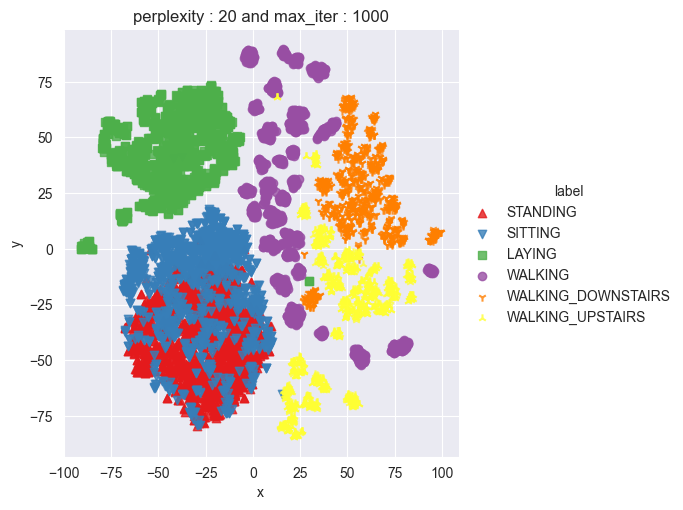

Done


In [15]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[20])

train에서 'subject'와 'Activity' 열을 제외한 데이터를 X_pre_tsne에 저장
'Activity' 열만 y_pre_tsne에 저장
perform_tsne() 함수로 t-SNE 시각화

In [16]:
data = pd.concat([train, test]) #train 데이터와 test 데이터를 합침
data = train.sample(frac=1) # train 데이터를 무작위로 섞은 다음 섞인 데이터를 data 변수에 저장
# --> why? 데이터가 순서대로 정렬되어 있을 경우 모델의 학습이나 검증 결과에 영향을 미칠 수 있다. 데이터를 섞어서 모델의 학습과 검증을 더욱 정확하게 할 수 있음.
f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')] # 주파수, 시간 등의 정보가 포함된 특징을 나타내는 컬럼들을 각각 f_df와 t_df 변수에 저장
X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']
X_f = f_df.drop(['subject', 'Activity'], axis=1)
y_f = f_df['Activity']
X_t = t_df.drop(['subject', 'Activity'], axis=1)
y_t = t_df['Activity']
'''
df data에서 세 가지 다른 데이터프레임을 생성
subject와 Activity를 제외한 모든 열을 선택하여 X에 저장. data에서 Activity 열만 선택하여 y에 저장.
-> X는 특징 데이터 / y는 레이블
f_df와 t_df 데이터프레임을 생성.
f_df는 시계열 특징 데이터를 포함하고 있는 데이터프레임 /t_df는 시계열 데이터를 제외한 특징 데이터를 포함하고 있는 데이터프레임 /
y_t는 t_df에서 Activity 열만 선택'''
# PCA를 사용해서 차원 축소
# PCA(Principal Component Analysis)를 사용해서 데이터의 분산을 최대한 보존하면서 차원을 축소
pca = PCA(n_components=0.99)
pca.fit(X)
x_reduced = pca.transform(X)
print(f'주판수 성분은 {X_f.shape[1]},  시간 성분은 {X.shape[1] - X_f.shape[1]}')
print(f'데이터의 특징은 {X.shape[1]}, PCA를 사용해서 축소된 성분은 {x_reduced.shape[1]}')

주판수 성분은 296,  시간 성분은 265
데이터의 특징은 561, PCA를 사용해서 축소된 성분은 155


In [19]:
#  데이터셋 train/test 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True,
                                                                    random_state=42)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, shuffle=True, random_state=42)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, shuffle=True, random_state=42)

In [20]:
kernal_evals = dict() # 모델 평가 결과를 저장할 딕셔너리

# 모델을 평가, 결과를 출력, kernal_evals 딕셔너리에 저장
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall,
                               test_recall]
    print(f"Training Accuracy {name} is {train_accuracy * 100},  Test Accuracy {name} is {test_accuracy * 100}")
    print(f"Training Precesion {name} is {train_precision * 100},  Test Accuracy {name} is {test_precision * 100}")
    print(f"Training Recall {name} is {train_recall * 100},  Test Accuracy {name} is {test_recall * 100}")

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                                display_labels=['LAYING', 'SITTING', 'STANDING', 'WALKING',
                                                                'DOWNSTAIRS', 'UPSTAIRS'])
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    cm_display.plot(ax=ax)

D:\Danu\WorkerSafety\DA\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy Logistic Regression is 98.9797653460296,  Test Accuracy Logistic Regression is 98.30047586675731
Training Precesion Logistic Regression is 98.9797653460296,  Test Accuracy Logistic Regression is 98.30047586675731
Training Recall Logistic Regression is 98.9797653460296,  Test Accuracy Logistic Regression is 98.30047586675731


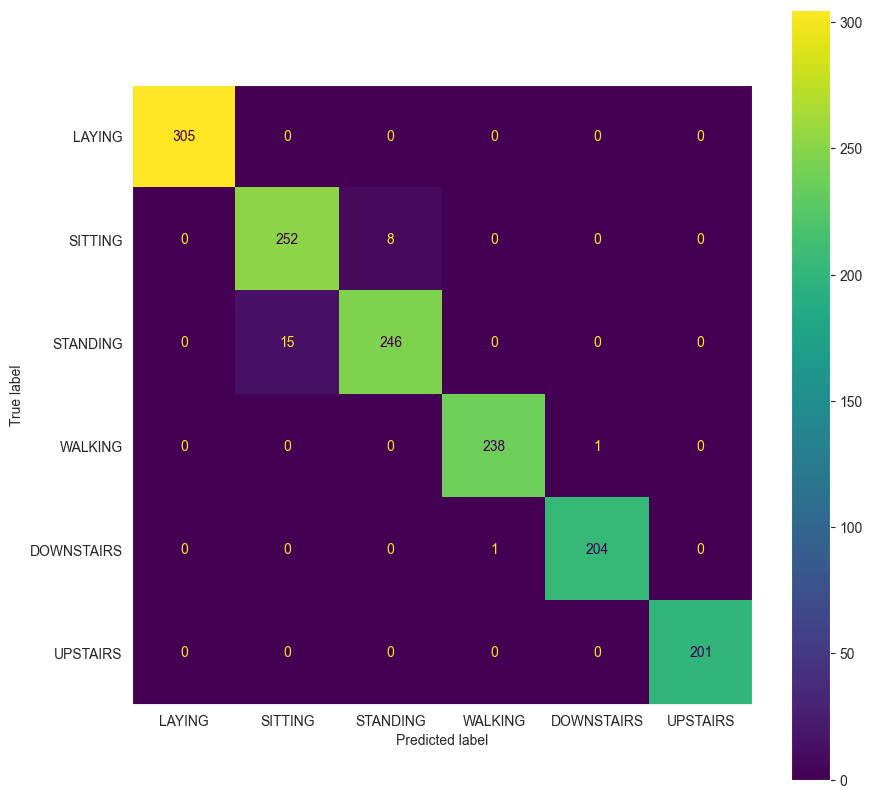

In [21]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

Training Accuracy LinearDiscriminantAnalysis is 98.46964801904437,  Test Accuracy LinearDiscriminantAnalysis is 98.70836165873556
Training Precesion LinearDiscriminantAnalysis is 98.46964801904437,  Test Accuracy LinearDiscriminantAnalysis is 98.70836165873556
Training Recall LinearDiscriminantAnalysis is 98.46964801904437,  Test Accuracy LinearDiscriminantAnalysis is 98.70836165873556


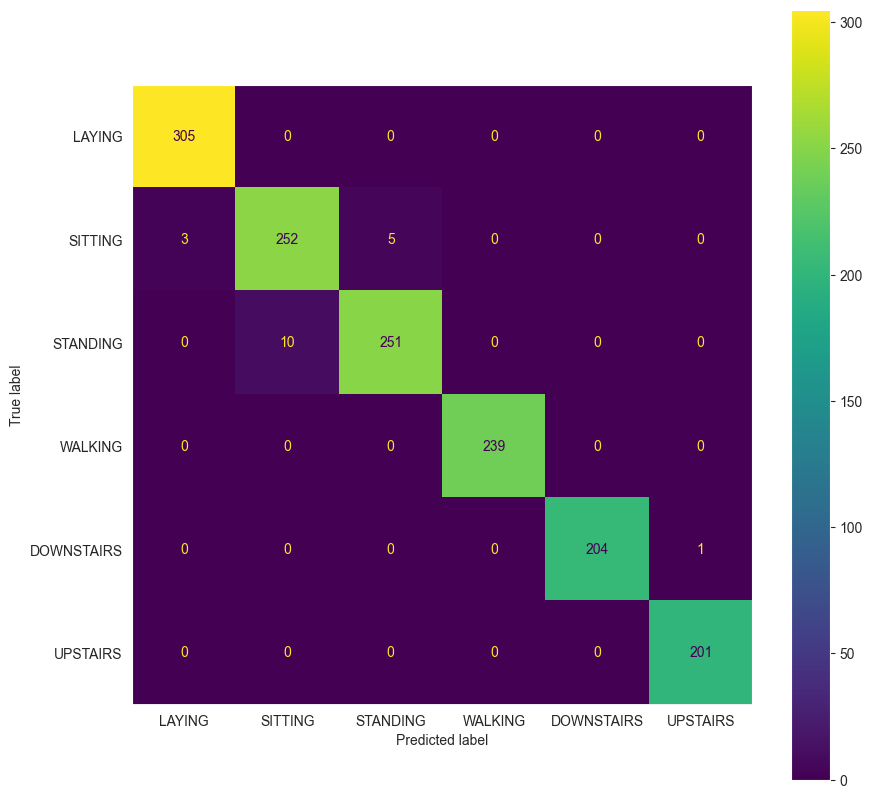

In [22]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
evaluate_classification(lda, "LinearDiscriminantAnalysis", x_train, x_test, y_train, y_test)

Training Accuracy KNeighborsClassifier is 95.5279714334297,  Test Accuracy KNeighborsClassifier is 95.98912304554725
Training Precesion KNeighborsClassifier is 95.5279714334297,  Test Accuracy KNeighborsClassifier is 95.98912304554725
Training Recall KNeighborsClassifier is 95.5279714334297,  Test Accuracy KNeighborsClassifier is 95.98912304554725


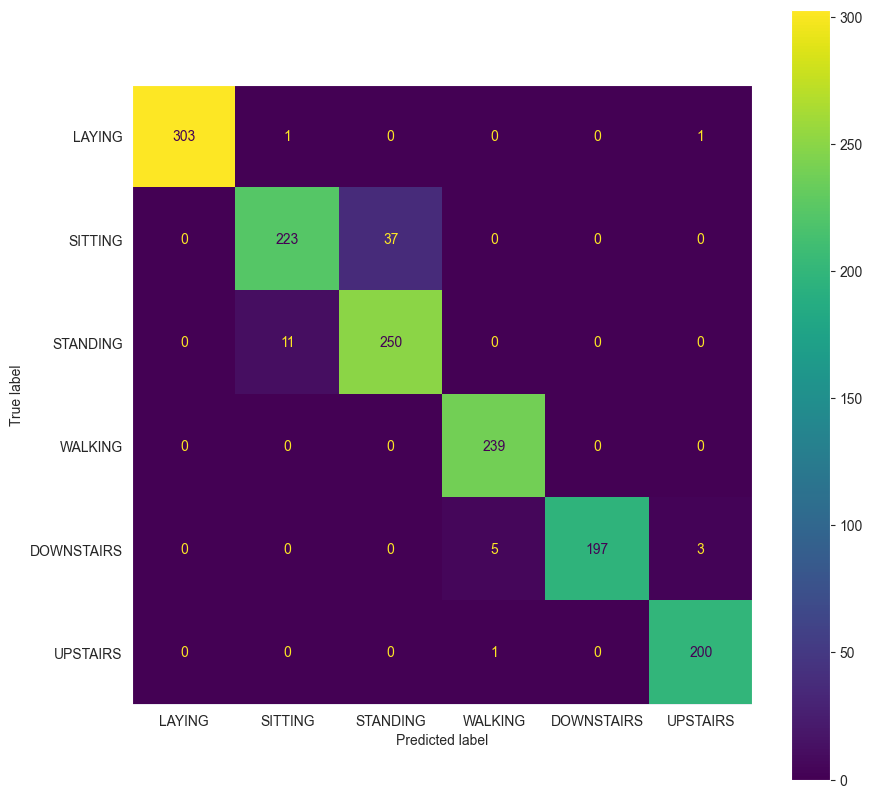

In [23]:
knn = KNeighborsClassifier(n_neighbors=30).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

Training Accuracy GaussianNB is 71.39942186702942,  Test Accuracy GaussianNB is 70.63222297756629
Training Precesion GaussianNB is 71.39942186702942,  Test Accuracy GaussianNB is 70.63222297756629
Training Recall GaussianNB is 71.39942186702942,  Test Accuracy GaussianNB is 70.63222297756629


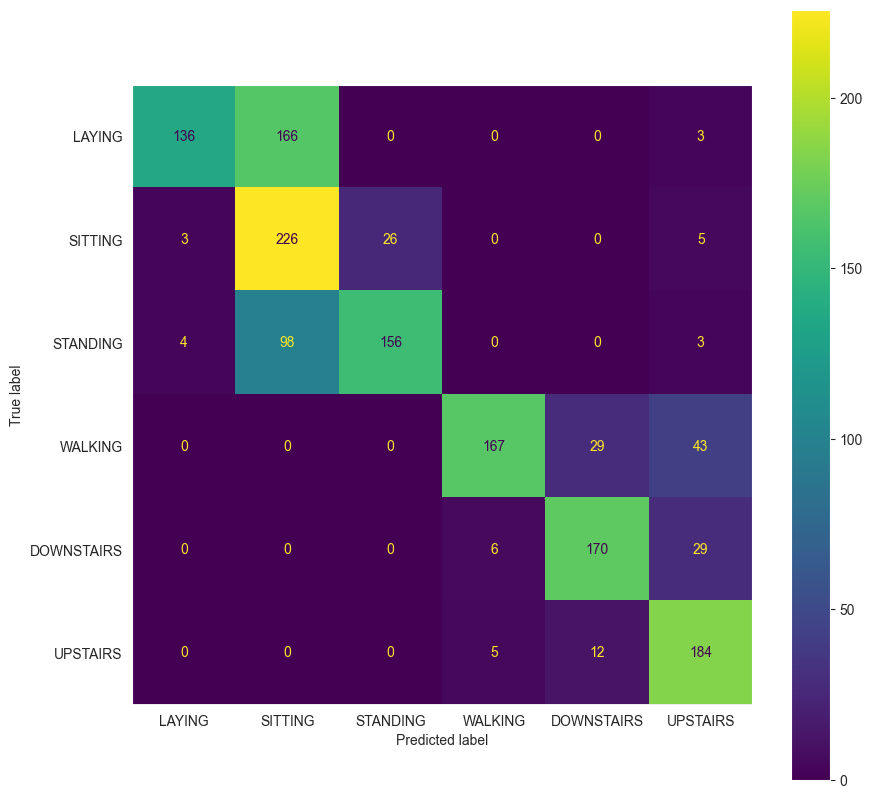

In [24]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

D:\Danu\WorkerSafety\DA\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(LBasedImpl) is 99.45587485121578,  Test Accuracy Linear SVC(LBasedImpl) is 98.9802855200544
Training Precesion Linear SVC(LBasedImpl) is 99.45587485121578,  Test Accuracy Linear SVC(LBasedImpl) is 98.9802855200544
Training Recall Linear SVC(LBasedImpl) is 99.45587485121578,  Test Accuracy Linear SVC(LBasedImpl) is 98.9802855200544


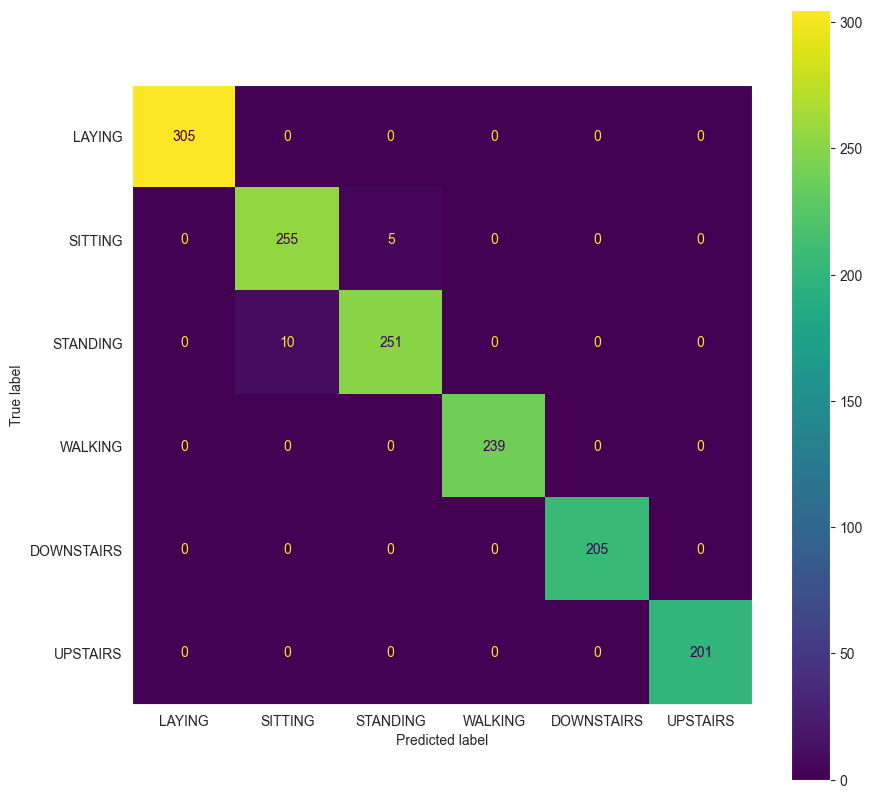

In [25]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

Training Accuracy RBF SVC is 97.5344329195715,  Test Accuracy RBF SVC is 98.36845683208702
Training Precesion RBF SVC is 97.5344329195715,  Test Accuracy RBF SVC is 98.36845683208702
Training Recall RBF SVC is 97.5344329195715,  Test Accuracy RBF SVC is 98.36845683208702


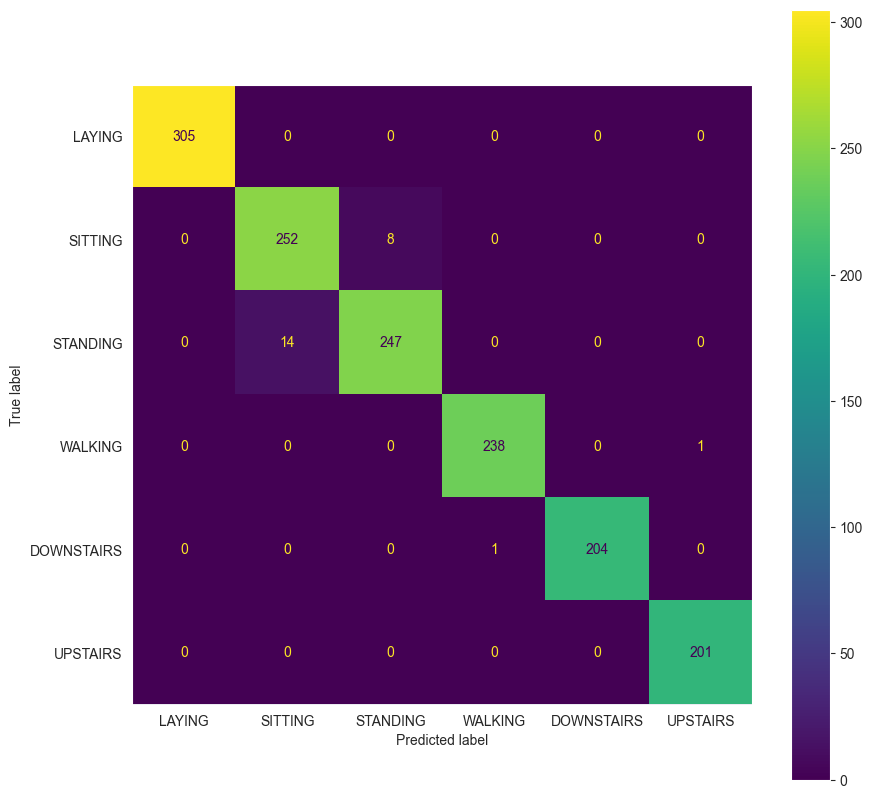

In [26]:
rbf = svm.SVC(kernel='rbf').fit(x_train, y_train)
evaluate_classification(rbf, "RBF SVC", x_train, x_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier is 100.0,  Test Accuracy DecisionTreeClassifier is 94.49354180829368
Training Precesion DecisionTreeClassifier is 100.0,  Test Accuracy DecisionTreeClassifier is 94.49354180829368
Training Recall DecisionTreeClassifier is 100.0,  Test Accuracy DecisionTreeClassifier is 94.49354180829368


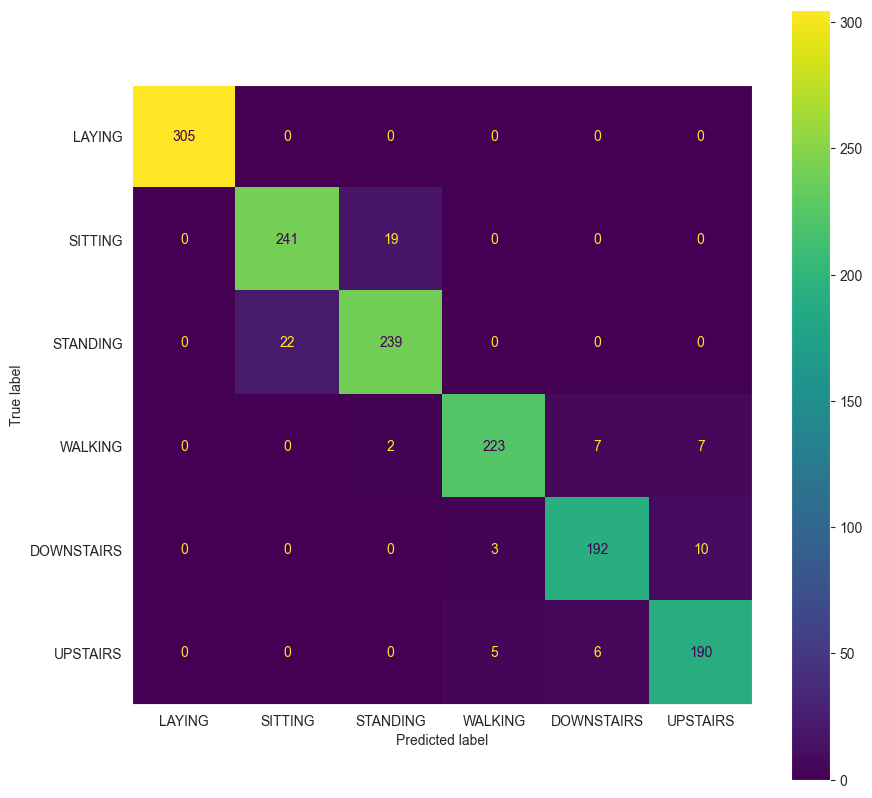

In [27]:
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

Training Accuracy RandomForestClassifier is 100.0,  Test Accuracy RandomForestClassifier is 98.57239972807615
Training Precesion RandomForestClassifier is 100.0,  Test Accuracy RandomForestClassifier is 98.57239972807615
Training Recall RandomForestClassifier is 100.0,  Test Accuracy RandomForestClassifier is 98.57239972807615


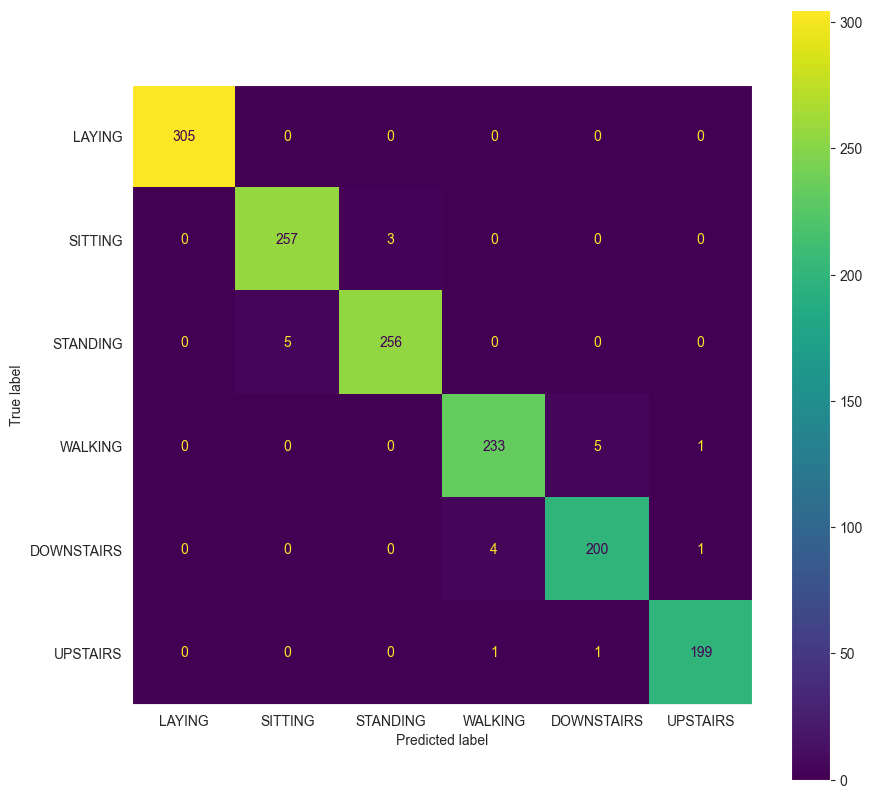

In [28]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

Training Accuracy XGBClassifier is 98.82673014793403,  Test Accuracy XGBClassifier is 97.48470428280082
Training Precesion XGBClassifier is 98.82673014793403,  Test Accuracy XGBClassifier is 97.48470428280082
Training Recall XGBClassifier is 98.82673014793403,  Test Accuracy XGBClassifier is 97.48470428280082


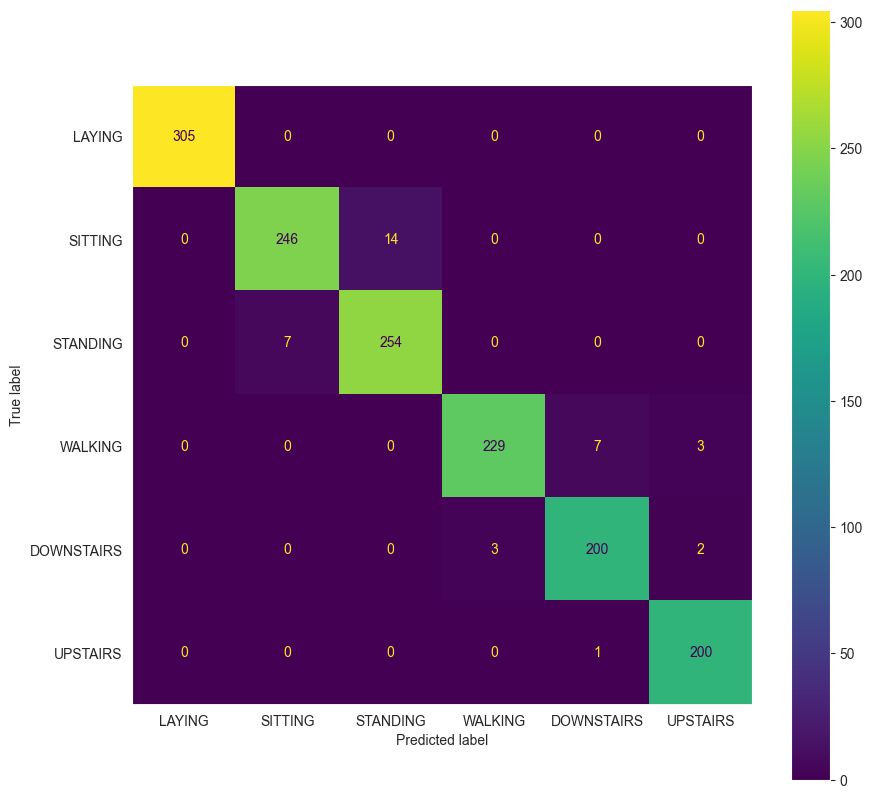

In [29]:
le = preprocessing.LabelEncoder().fit(y_train)
y_xgb_train = le.transform(y_train)
y_xgb_test = le.transform(y_test)
xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 5,
              'booster': 'gbtree',
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}
xgb = XGBClassifier(**xgb_params).fit(x_train, y_xgb_train)
evaluate_classification(xgb, "XGBClassifier", x_train, x_test, y_xgb_train, y_xgb_test)

C:\Users\SW402-08\AppData\Local\Temp\ipykernel_10976\860462048.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys)


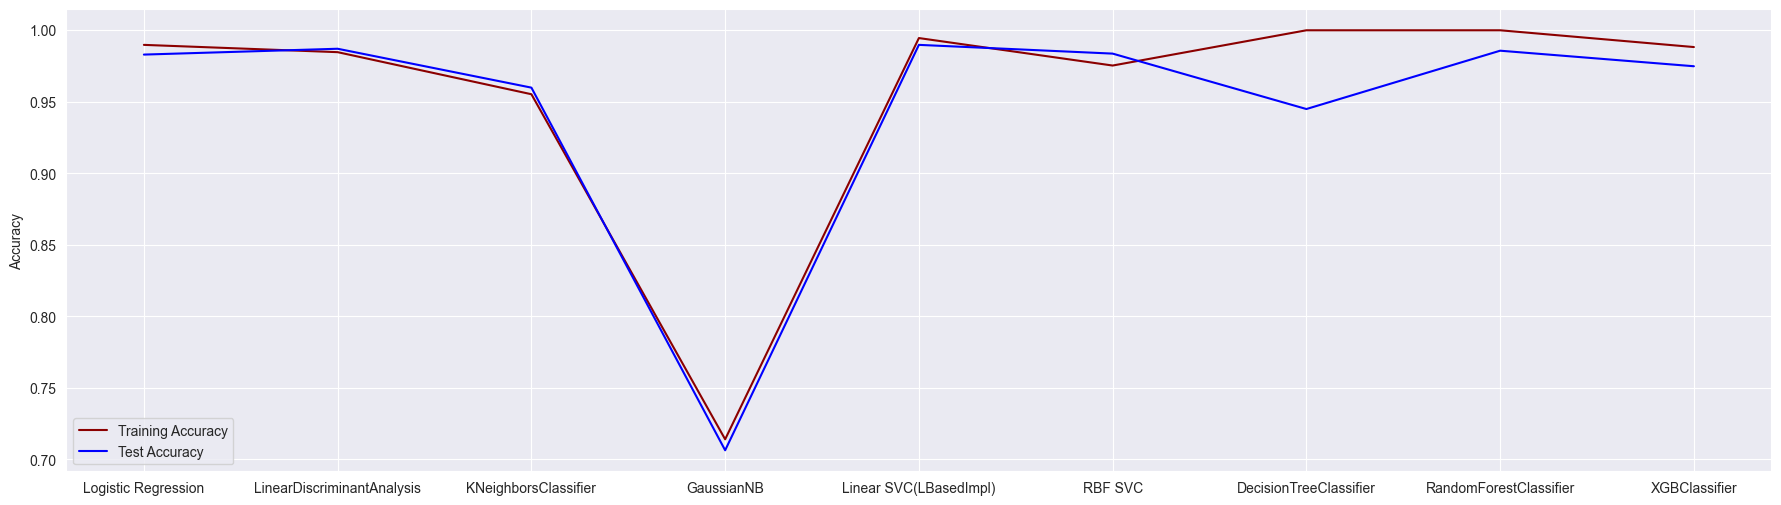

In [30]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[0] for value in values], color='darkred')
ax.plot(np.arange(len(keys)), [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

C:\Users\SW402-08\AppData\Local\Temp\ipykernel_10976\936248568.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys, fontsize=20)


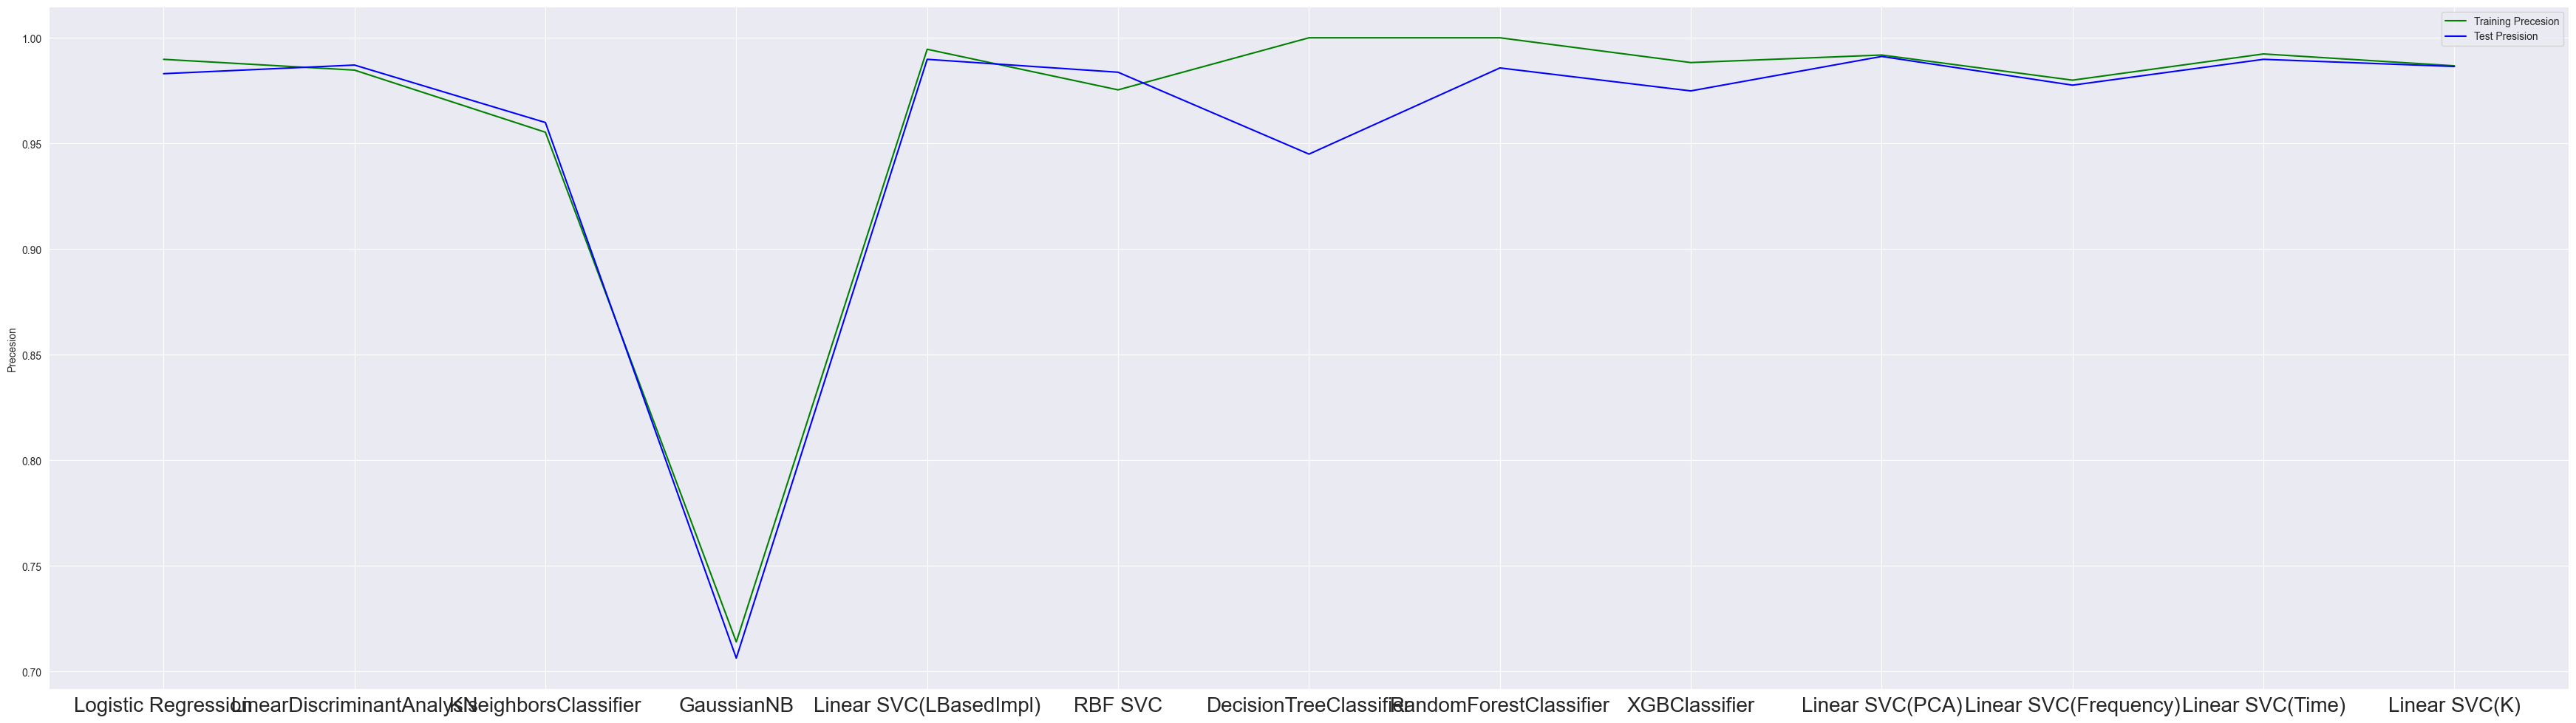

In [45]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(44, 12))
ax.plot(np.arange(len(keys)), [value[2] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[3] for value in values], color='b')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys, fontsize=20)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

C:\Users\SW402-08\AppData\Local\Temp\ipykernel_10976\3625037151.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys)


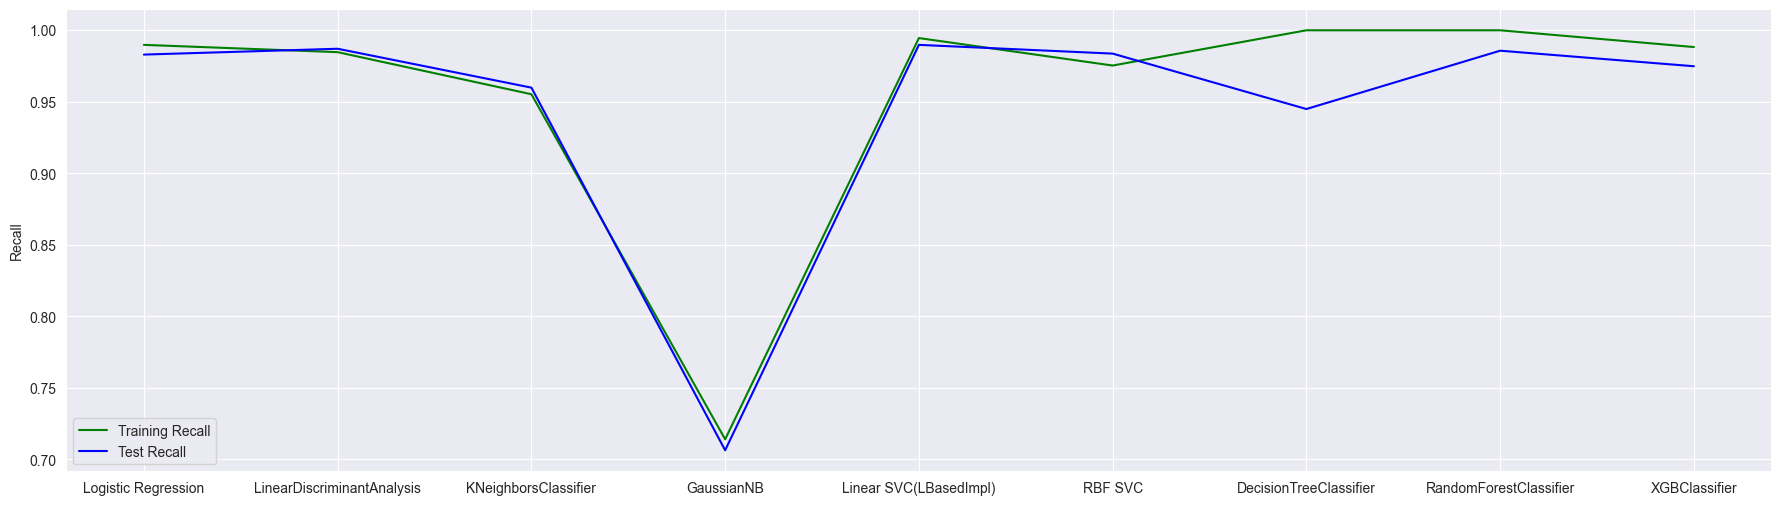

In [32]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[4] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[5] for value in values], color='b')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()

D:\Danu\WorkerSafety\DA\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(PCA) is 99.18381227682367,  Test Accuracy Linear SVC(PCA) is 99.1162474507138
Training Precesion Linear SVC(PCA) is 99.18381227682367,  Test Accuracy Linear SVC(PCA) is 99.1162474507138
Training Recall Linear SVC(PCA) is 99.18381227682367,  Test Accuracy Linear SVC(PCA) is 99.1162474507138


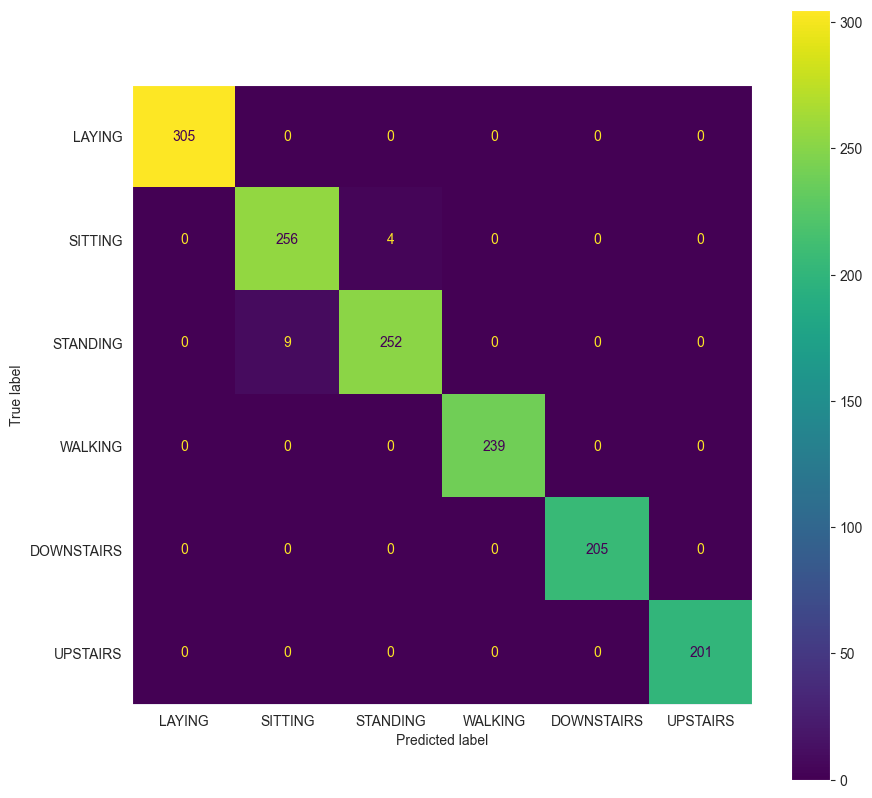

In [33]:
lin_svc_pca = svm.LinearSVC().fit(x_train_pca, y_train_pca)
evaluate_classification(lin_svc_pca, "Linear SVC(PCA) 이걸로 픽스", x_train_pca, x_test_pca, y_train_pca, y_test_pca)

D:\Danu\WorkerSafety\DA\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(Frequency) is 97.9935385138582,  Test Accuracy Linear SVC(Frequency) is 97.75662814411965
Training Precesion Linear SVC(Frequency) is 97.9935385138582,  Test Accuracy Linear SVC(Frequency) is 97.75662814411965
Training Recall Linear SVC(Frequency) is 97.9935385138582,  Test Accuracy Linear SVC(Frequency) is 97.75662814411965


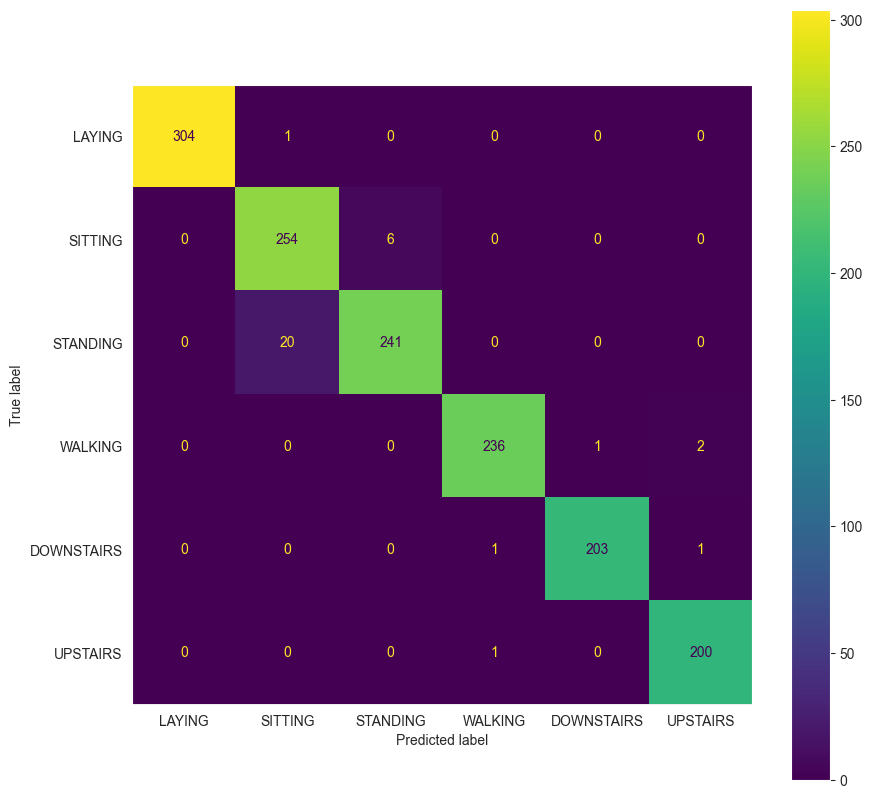

In [34]:
lin_svc_f = svm.LinearSVC().fit(x_train_f, y_train_f)
evaluate_classification(lin_svc_f, "Linear SVC(Frequency)", x_train_f, x_test_f, y_train_f, y_test_f)

D:\Danu\WorkerSafety\DA\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(Time) is 99.2348240095222,  Test Accuracy Linear SVC(Time) is 98.9802855200544
Training Precesion Linear SVC(Time) is 99.2348240095222,  Test Accuracy Linear SVC(Time) is 98.9802855200544
Training Recall Linear SVC(Time) is 99.2348240095222,  Test Accuracy Linear SVC(Time) is 98.9802855200544


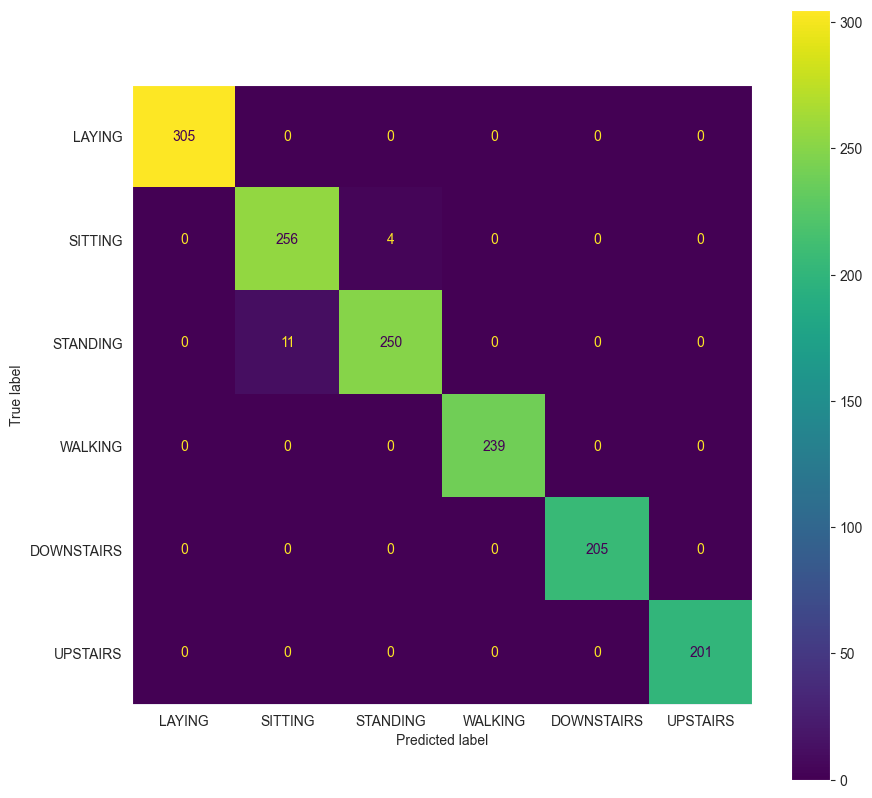

In [35]:
lin_svc_t = svm.LinearSVC().fit(x_train_t, y_train_t)
evaluate_classification(lin_svc_t, "Linear SVC(Time)", x_train_t, x_test_t, y_train_t, y_test_t)

Number of best for Anova is 180


D:\Danu\WorkerSafety\DA\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(K) is 98.67369494983846,  Test Accuracy Linear SVC(K) is 98.64038069340585
Training Precesion Linear SVC(K) is 98.67369494983846,  Test Accuracy Linear SVC(K) is 98.64038069340585
Training Recall Linear SVC(K) is 98.67369494983846,  Test Accuracy Linear SVC(K) is 98.64038069340585


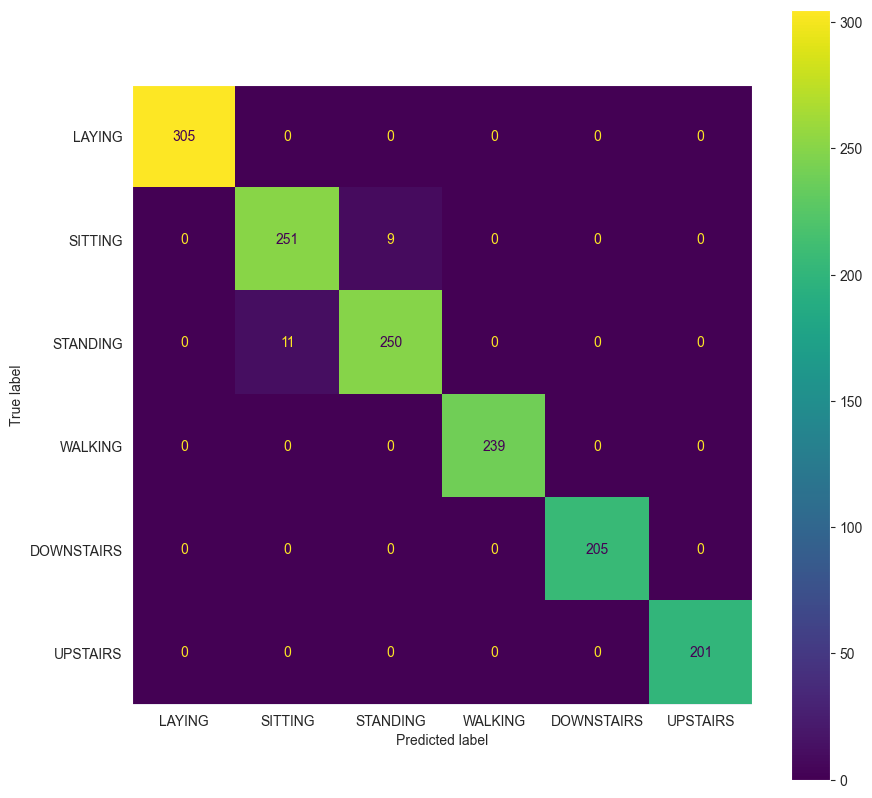

In [36]:
X_f_classif_k = SelectKBest(score_func=f_classif, k=180).fit_transform(X_t, y_t)
print('Number of best for Anova is {}'.format(X_f_classif_k.shape[1]))
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(X_f_classif_k, y, test_size=0.2, shuffle=True,
                                                            random_state=42)
lin_svc_k = svm.LinearSVC().fit(x_train_k, y_train_k)
evaluate_classification(lin_svc_k, "Linear SVC(K)", x_train_k, x_test_k, y_train_k, y_test_k)